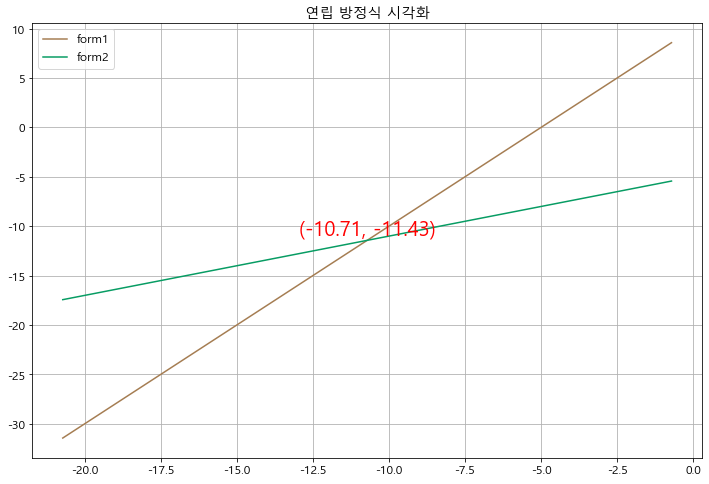

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
dic = {}

with open('file.txt', 'r') as f:
    tmp = f.readlines()
    for i,v in enumerate(tmp):
        tmp[i] = v.replace(' ','').strip()
        xpos = tmp[i].find('x')
        ypos = tmp[i].find('y')
        EQpos = tmp[i].find('=')
        try:
            dic['form%d' %(i + 1)] = [int(tmp[i][:xpos]), int(tmp[i][xpos + 1: ypos]), int(tmp[i][EQpos + 1:])]
        except:
            print('입력 함수에 계수 1을 생략하면 안됩니다.')
            exit()

matA = np.empty((0,2), int)
for i in dic:
    matA = np.append(matA, np.array([dic[i][:2]]), axis = 0)

matB = np.empty((0,1), int)
for i in dic:
    matB = np.append(matB, np.array([dic[i][-1:]]), axis = 0)

ANSmat = np.linalg.inv(matA) @ matB

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["axes.unicode_minus"] = False

plt.figure()

for i in range(0, len(dic)):
    x = np.linspace(ANSmat[0][0]-10, ANSmat[0][0] + 10, 100)
    y = -(matA[i][0]/matA[i][1]) * x + (matB[i]/matA[i][1])
    z = np.polyfit(x, y, 1)   # (X,Y,차원) 정의
    f = np.poly1d(z)

    plt.plot(x,f(x),color = (rd.random(),rd.random(),rd.random()))
    
label = []
for i in dic:
    label.append(i)
plt.grid()
plt.legend(label)
plt.title('연립 방정식 시각화')

string = '(%0.2f, %0.2f)' %(ANSmat[0][0],ANSmat[1][0])
plt.text(ANSmat[0][0], ANSmat[1][0], string, color = 'red',fontsize = 20,horizontalalignment = 'center', verticalalignment = 'bottom' )
plt.show()
plt.close()